In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import local functions
from general_functions import *

In [2]:
# Import data
reghub_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgTerpuaYKsupEgYA?e=vctydO")
df = pd.read_csv(reghub_data_link)

categories_data_link = onedrive_download("https://1drv.ms/u/s!AoiE7xOoBAsngsgkB0_f7WIAay63-Q?e=7XgCep")
df_categories = pd.read_csv(categories_data_link)

In [3]:
# Import categories as lists
pers_cat_words = list(df_categories["personnel"].dropna())
prod_cat_words = list(df_categories["product"].dropna())
colab_cat_words = list(df_categories["collaboration"].dropna())
legal_cat_words = list(df_categories["legal"].dropna())

In [4]:
# Create rule based category labels
# Add columns for rule-based labels
df["rule_labels_pers"] = "Other"
df["rule_labels_prod"] = "Other"
df["rule_labels_colab"] = "Other"
df["rule_labels_legal"] = "Other"

# Match words from the category lists
for index, row in df.iterrows():
    if any(word.lower() in row["news_content"].lower() for word in pers_cat_words):
        df.at[index, "rule_labels_pers"] = "personnel"
    if any(word.lower() in row["news_content"].lower() for word in prod_cat_words):
        df.at[index, "rule_labels_prod"] = "product"
    if any(word.lower() in row["news_content"].lower() for word in colab_cat_words):
        df.at[index, "rule_labels_colab"] = "collaboration"
    if any(word.lower() in row["news_content"].lower() for word in legal_cat_words):
        df.at[index, "rule_labels_legal"] = "legal"

In [5]:
# Compress the four category columns into one
df['rule_labels_comb'] = df[['rule_labels_pers', 'rule_labels_prod', 'rule_labels_colab', 'rule_labels_legal']].values.tolist()
df['rule_labels_comb'] = df['rule_labels_comb'].apply(lambda lst: [val for val in lst if val != 'Other'])
df.drop(columns=["rule_labels_pers", "rule_labels_prod", "rule_labels_colab", "rule_labels_legal"], inplace=True)

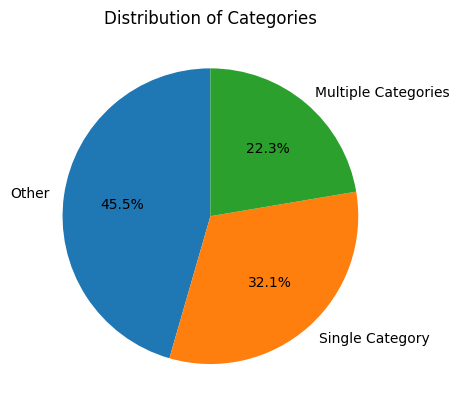

In [6]:
# Visulaization
count_empty = df['rule_labels_comb'].apply(len).eq(0).sum()
count_single = df['rule_labels_comb'].apply(len).eq(1).sum()
count_multiple = df['rule_labels_comb'].apply(len).gt(1).sum()

# Data for plotting
labels = ['Other', 'Single Category', 'Multiple Categories']
sizes = [count_empty, count_single, count_multiple]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()

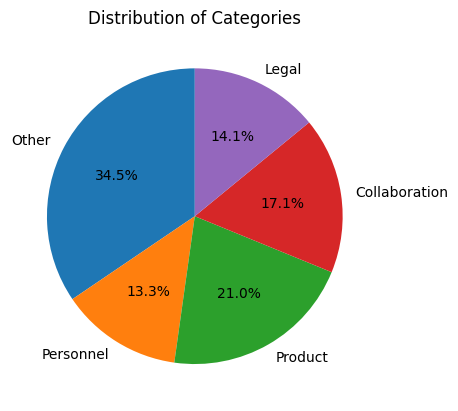

In [7]:
# Visualization
count_empty = df['rule_labels_comb'].apply(len).eq(0).sum()
count_pers = df['rule_labels_comb'].apply(lambda lst: lst.count('personnel')).sum()
count_prod = df['rule_labels_comb'].apply(lambda lst: lst.count('product')).sum()
count_colab = df['rule_labels_comb'].apply(lambda lst: lst.count('collaboration')).sum()
count_legal = df['rule_labels_comb'].apply(lambda lst: lst.count('legal')).sum()

# Data for plotting
labels = ['Other', 'Personnel', 'Product', 'Collaboration', 'Legal']
sizes = [count_empty, count_pers, count_prod, count_colab, count_legal]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Categories')
plt.show()